# This notebook compares the V15 and V20 prediction errors for different bitstrings/categories

### Load the data

In [3]:
import pandas as pd
df = pd.read_pickle('tmp_data/clean_yearly_data_w_V15X.pkl')

### Create a plotting function

In [4]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


def RobinsonPlot(df,z,vmin,vmax,cmap,markersize,savefig,ncircles):


    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    x = df['latitude_ERA']
    y = df['longitude_ERA']
    z1 = df[z]
    
    
    #Normalise
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    #Colorbar
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                               norm=norm,
                               orientation='horizontal'
                               )
    #Scatter points
    sc = ax.scatter(y,x,transform=ccrs.PlateCarree(),
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    
    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)
    

    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    
    ax.scatter(180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.
    ax.scatter(-180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.

    #ax.scatter(180,0,c='k')

    #ax.set_xlim(-180,180)
    
    
    
    
    
    #Extra circles
    row = df.sort_values(by=['delta'],ascending=False).iloc[0:ncircles]
    xsel = row['latitude_ERA']
    ysel = row['longitude_ERA']
    
    sc_extra = ax.scatter(ysel,xsel,transform=ccrs.PlateCarree(),
                          s=200, facecolors='none', edgecolors='C2',lw=2
                          )

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    
    
    
    

## Lake - Table

In [5]:
df_lake = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant')
n = 7
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta','deltaX','deltaX15']])
display(df_lake.deltaX15.mean())
#0 = Brazil 1, south
#1 = Brazil 2, north
#2 = Gujarat
#3 = SLC
#4 = Chott Melrhir
#5 = Australia
#6 = Lake Natron


,latitude_ERA,longitude_ERA,delta,deltaX,deltaX15
16639,-21.779853,-52.148148,8.565804,0.532623,-0.238703
38231,-2.388758,-54.562500,5.517063,-1.018029,-1.031687
71526,24.028095,69.000000,5.123649,6.272882,0.639711
101073,41.170945,-113.400000,4.876928,2.530676,-0.303374
89077,34.145187,6.080000,2.532175,0.257852,-0.885760
24179,-15.316154,127.968750,2.315439,3.142792,0.429137
38367,-2.388758,36.000000,1.922324,2.163942,0.506929


-0.15212026

# Lake - High latitudes

In [6]:
northern_canada = df_lake.query('-141 < longitude_ERA < -92 & 60 < latitude_ERA < 70')
lena_river = df_lake.query('119 < longitude_ERA < 136 & 62 < latitude_ERA < 74')
high_latitutde_regions = pd.concat([northern_canada,lena_river])

0.031341072
-0.07452752


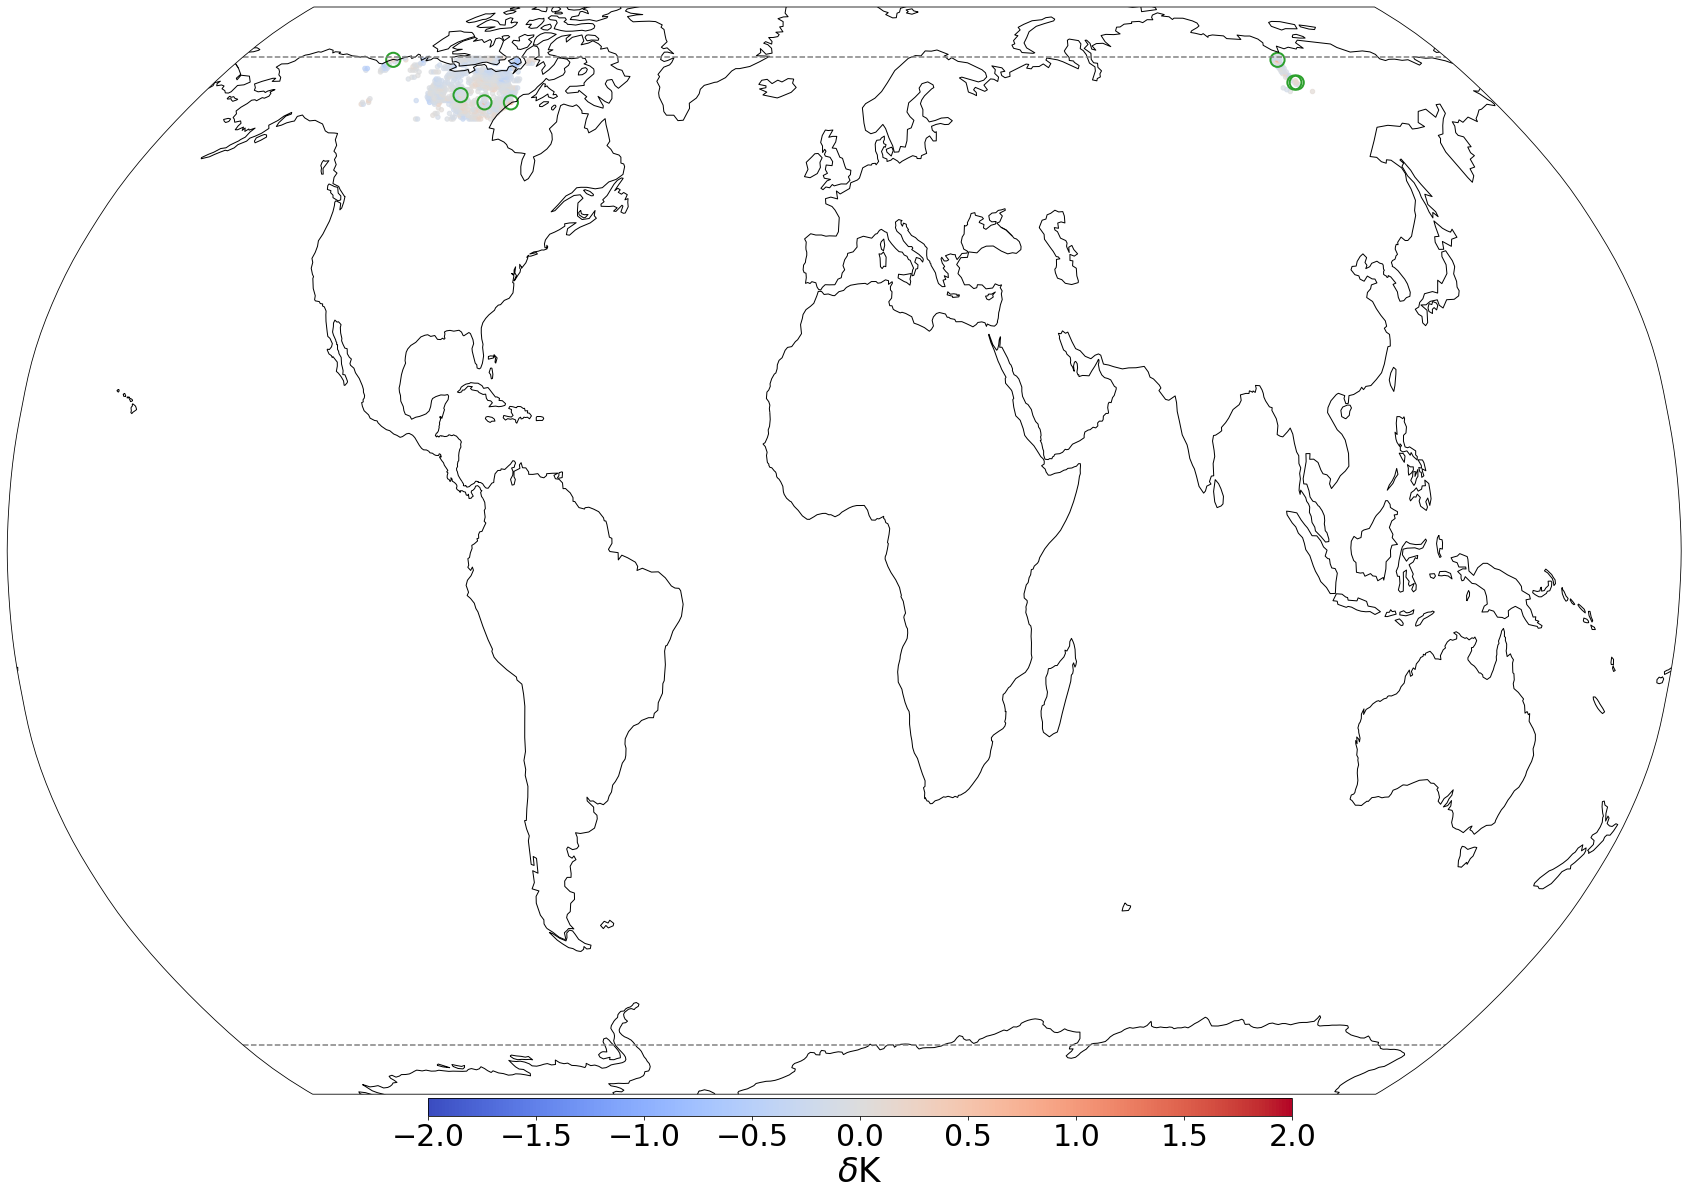

In [7]:
RobinsonPlot(high_latitutde_regions,'deltaX',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
print(high_latitutde_regions.delta.mean())
print(high_latitutde_regions.deltaX.mean())

# Lake - no veg changes

In [8]:
df_lake_strict = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not cvhFr_change_is_significant & not cvlFr_change_is_significant')

In [9]:
print(df_lake_strict.delta.mean())
print(df_lake_strict.deltaX.mean())

-0.77033347
-0.84216917


## Vegetation

,latitude_ERA,longitude_ERA,delta,deltaX,deltaX15
42655,1.264637,121.218750,14.226904,3.375281,0.330999
30656,-8.852456,120.656250,11.929180,4.055262,0.196537
140986,64.215421,23.750000,10.646625,0.033812,-0.011351
89829,34.426218,131.333333,9.833805,-0.100909,-0.365322
69456,22.903974,-83.400000,9.756284,0.256009,0.079630
105108,43.419187,-4.125000,9.469076,0.370014,-0.186890
3462,-42.576096,171.111111,9.087702,0.582571,0.284972
40086,-0.983606,98.718750,8.978683,0.001135,-0.203406
4389,-37.798581,148.666667,8.281747,0.267284,0.246887
135352,60.843060,-115.555556,7.511190,1.393916,-0.175815


7.9542475

0.2790734

-0.21212038

latitude_ERA   -8.852456
Name: 30656, dtype: object

-8.852456297387976
120.65625


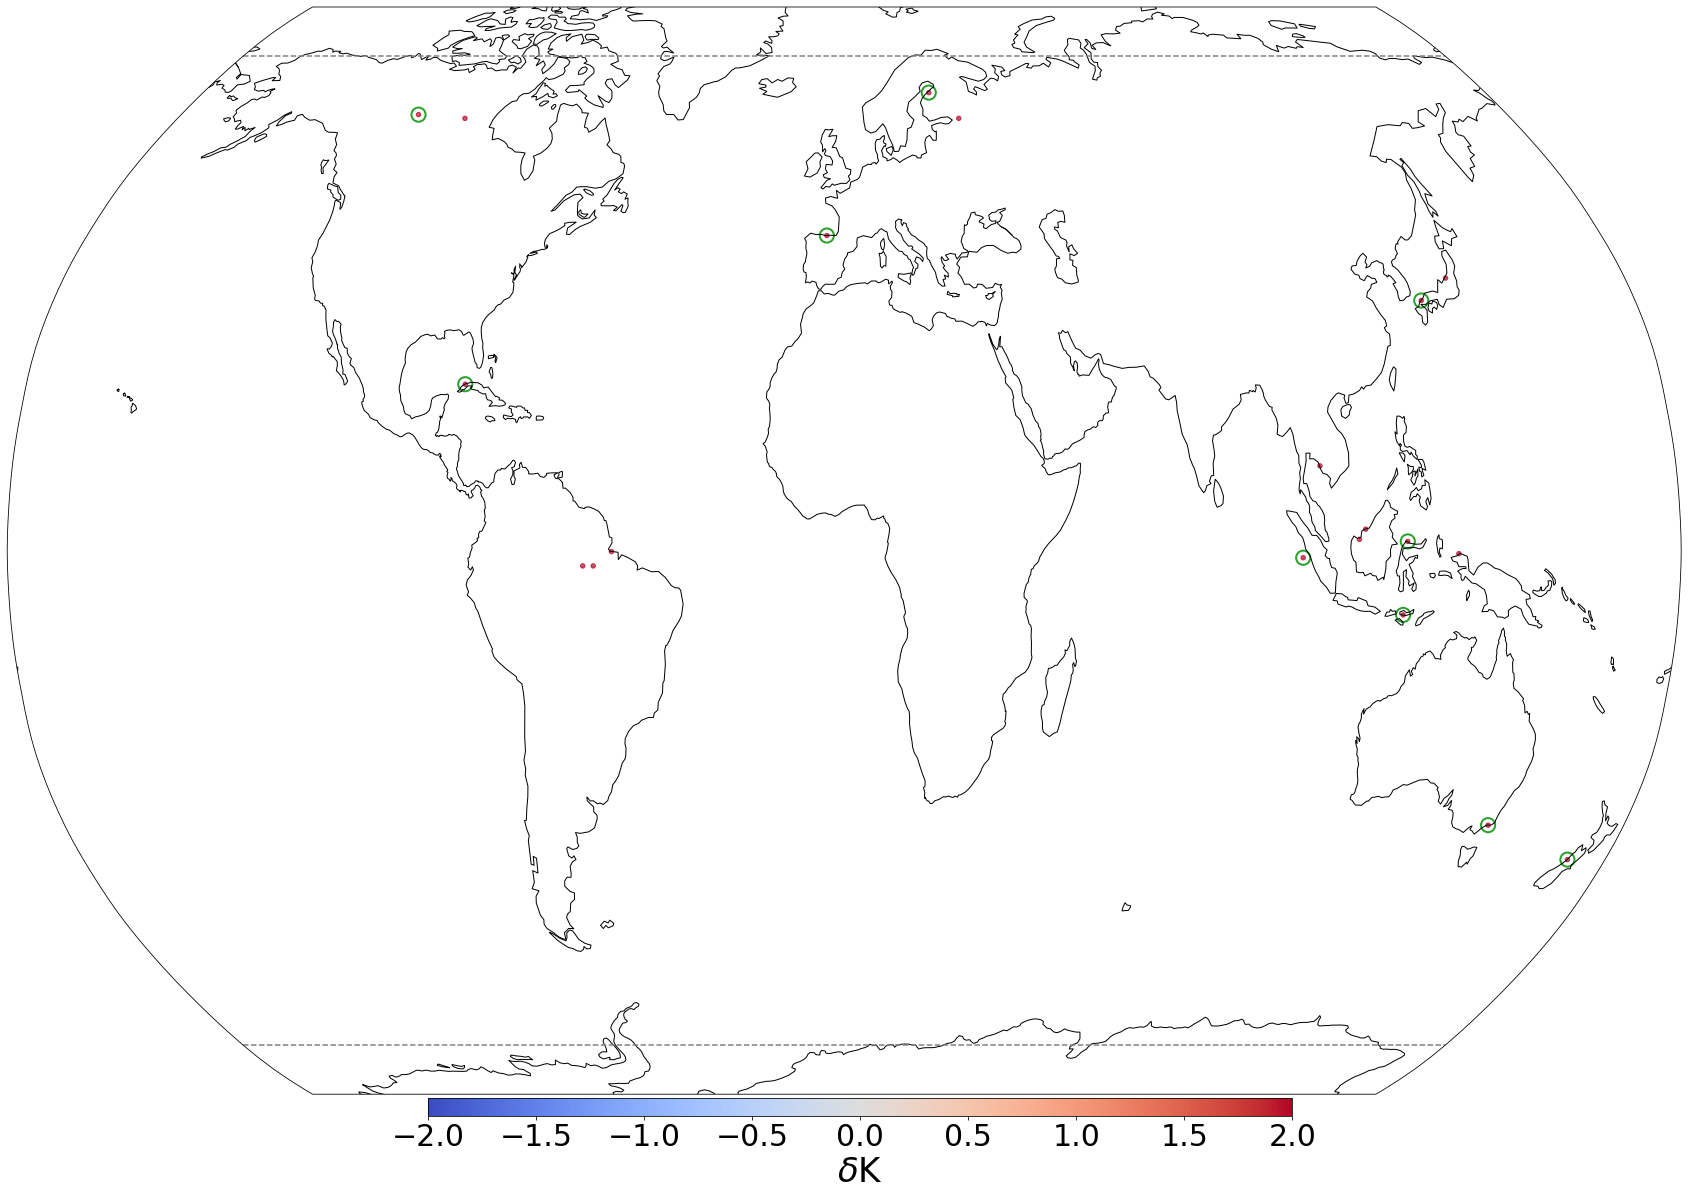

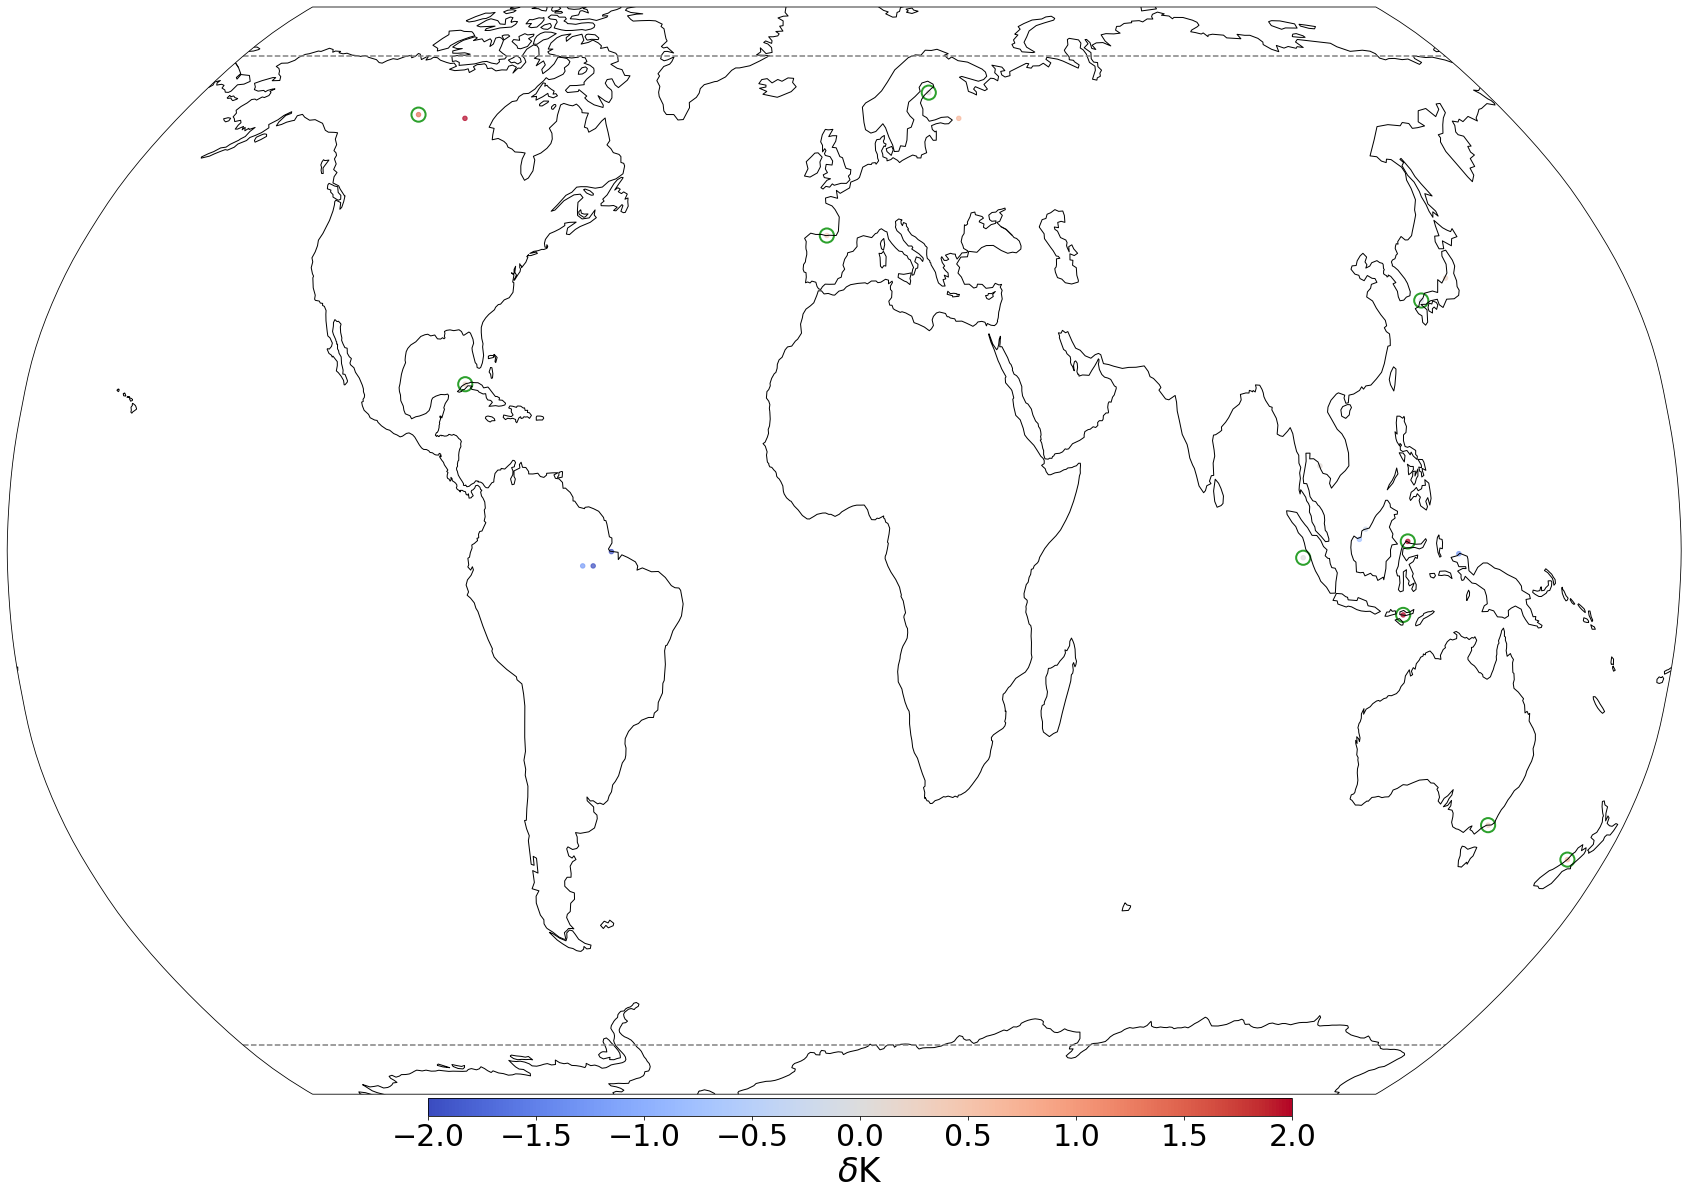

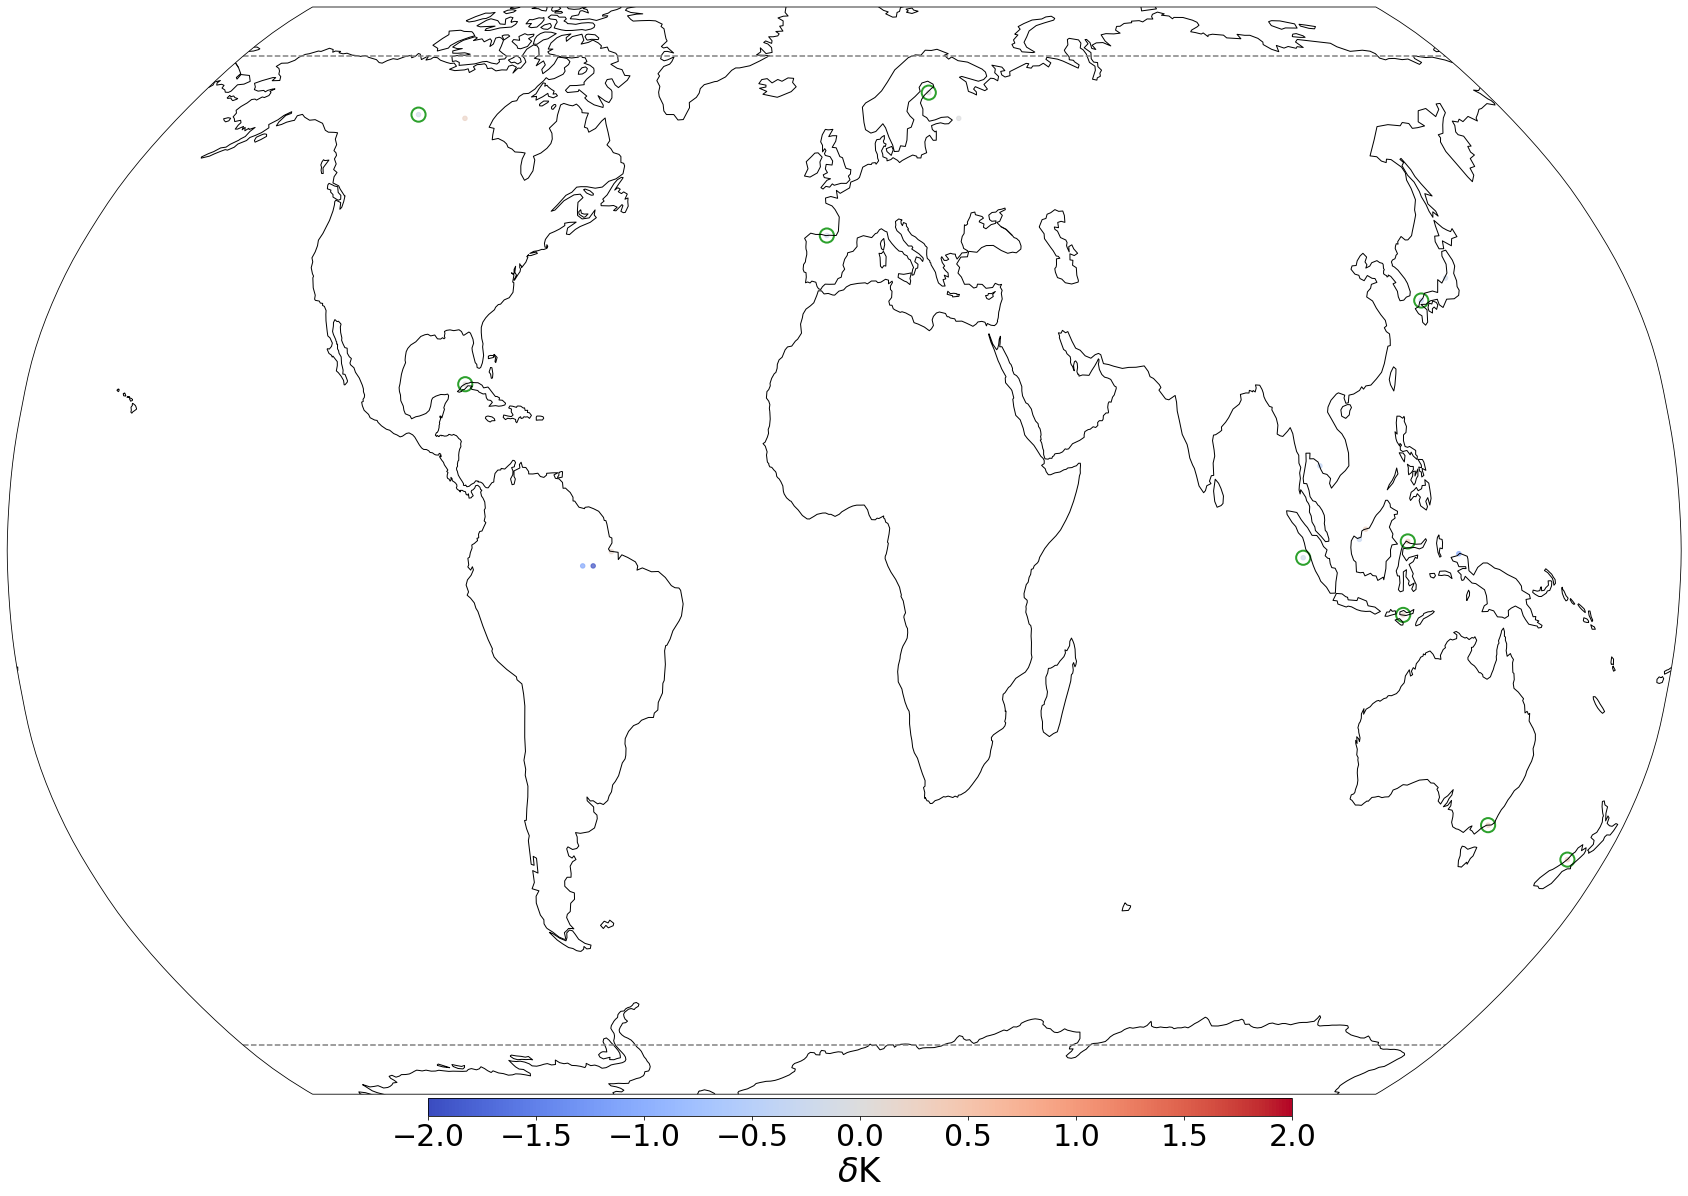

In [10]:
df_veg = df.query('cvhFr_change_is_significant & not clFr_change_is_significant & delta > 5')

n = 10
RobinsonPlot(df_veg,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
RobinsonPlot(df_veg,'deltaX',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
RobinsonPlot(df_veg,'deltaX15',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)

display(df_veg.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta','deltaX','deltaX15']])

display(df_veg.delta.mean())
display(df_veg.deltaX.mean())
display(df_veg.deltaX15.mean())
display(df_veg.sort_values(by=['delta'],ascending=False).iloc[1][['latitude_ERA']])
row = df_veg.sort_values(by=['delta'],ascending=False).iloc[1]
print (row.latitude_ERA)
print (row.longitude_ERA)




In [11]:
df_veg['change_in_cvh'] = df_veg['V15_cvhFr'] - df_veg['V20_cvhFr']

<ipython-input-11-1ca65b94fd37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_veg['change_in_cvh'] = df_veg['V15_cvhFr'] - df_veg['V20_cvhFr']


In [12]:
row = df_veg.query(' 60.90> latitude_ERA > 60.70 & delta > 0')#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr','change_in_cvh']]
row.iloc[0]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])
display(row.latitude_ERA)
display(row.longitude_ERA)

135352    60.84306
Name: latitude_ERA, dtype: float64

135352   -115.555556
Name: longitude_ERA, dtype: float64

## Ice

,latitude_ERA,longitude_ERA,delta,deltaX,deltaX15
133945,59.999970,-141.866667,4.654447,-1.450924,0.684357
2659,-49.320823,69.166667,3.111953,1.938502,-0.905708
145073,66.744690,-65.333333,2.798009,0.191082,0.878255
89218,34.145187,76.480000,2.705089,2.408566,1.225919
2131,-65.058510,-60.000000,2.208425,1.883096,-0.416269


-0.12768228

-0.2624511

latitude_ERA                      -49.320823
longitude_ERA                      69.166667
MODIS_LST_x                       279.357391
V15_prediction                    273.628998
V20_prediction                    270.418213
V20X_prediction                    271.64859
V15_error                           5.905395
V20_error                           9.017347
V20X_error                          7.843897
delta                               3.111953
deltaX                              1.938502
V15_clFr                            0.020383
V15_cvhFr                                0.0
V15_cvlFr                           0.864841
V15_dl                             31.013672
V15_oceanFr                              0.0
V15_si10Fr                               0.0
V15_z                            3771.574219
V20_clFr                            0.056965
V20_cvhFr                                0.0
V20_cvlFr                           0.304861
V20_dl                             14.499023
V20_oceanF

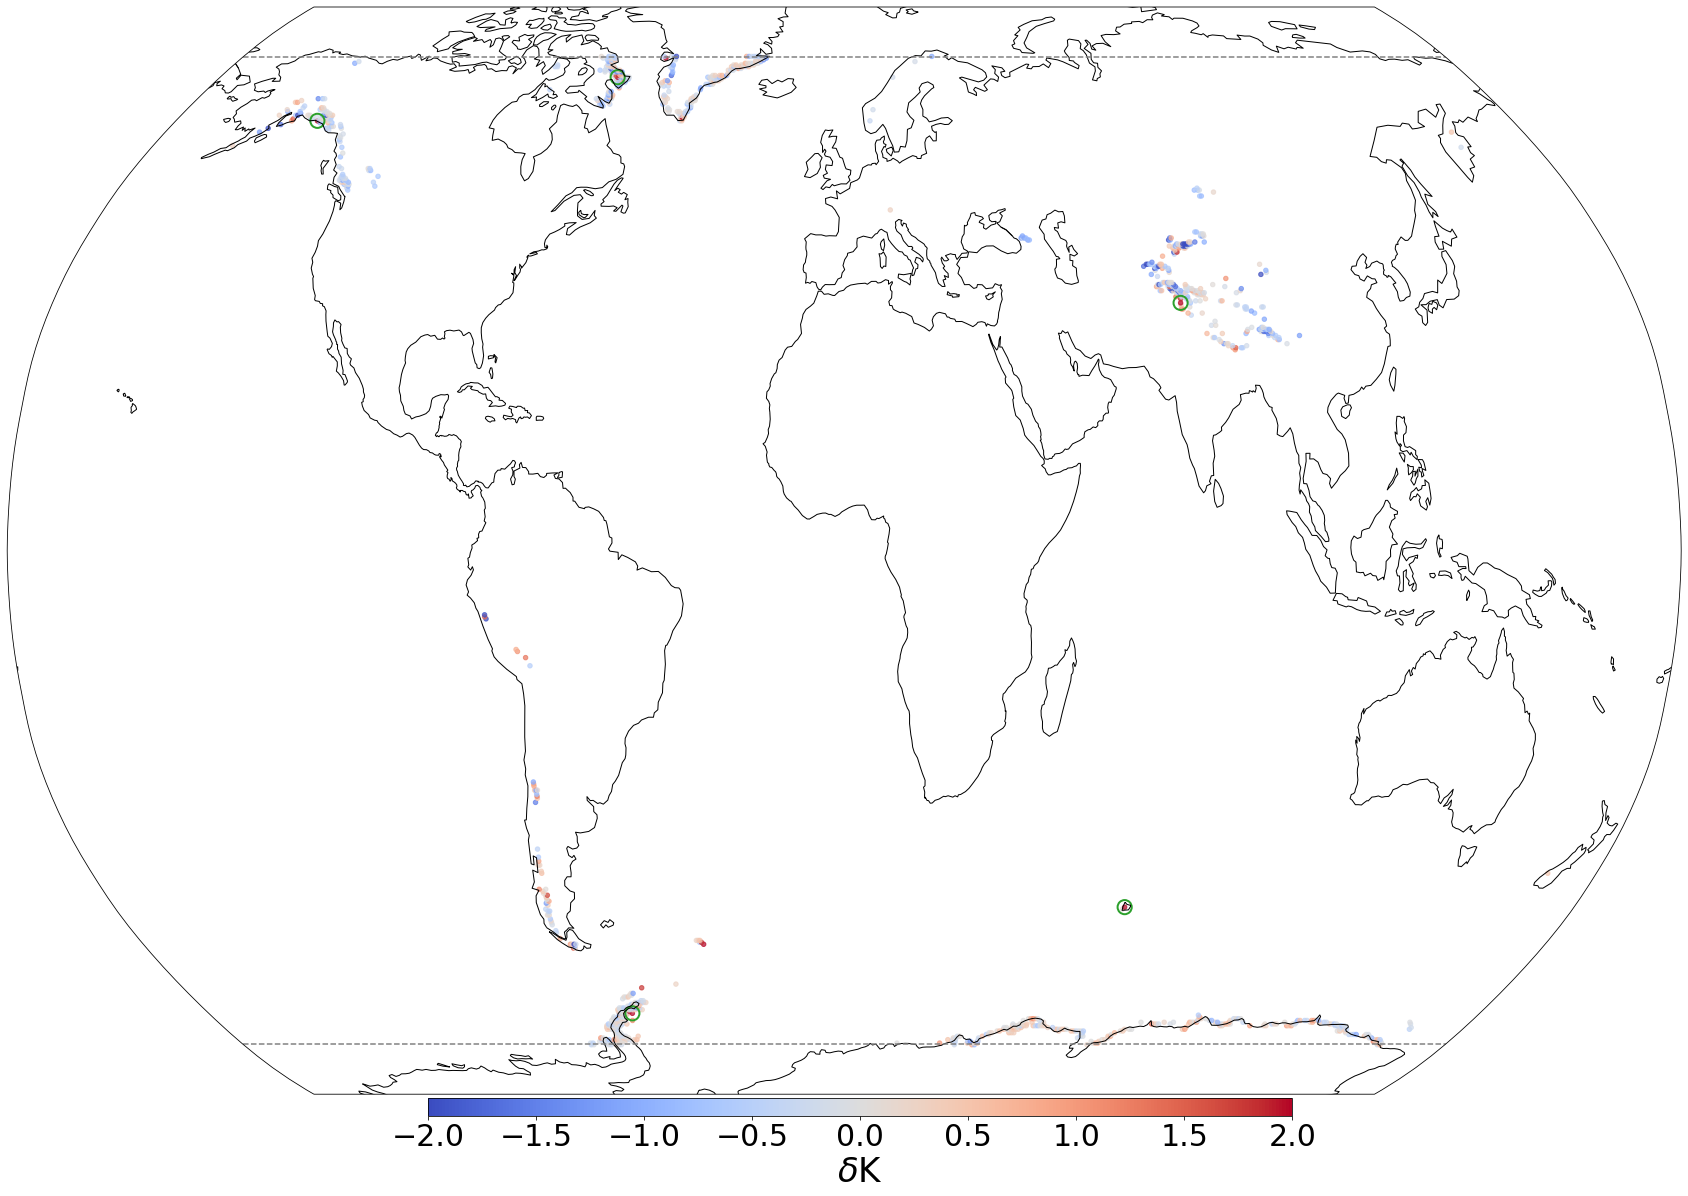

In [13]:
df_ice = df.query('si10Fr_change_is_significant ')
n = 5
RobinsonPlot(df_ice,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_ice.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta','deltaX','deltaX15']])
display(df_ice.delta.mean())
display(df_ice.deltaX.mean())


row = df_ice.sort_values(by=['delta'],ascending=False).iloc[1]
display(row)

## Deepdive

Now lets look at some particular points


## Deepdive - Lake bad points


In [14]:
#0 = Brazil 1, south
#1 = Brazil 2, north
#2 = Gujarat
#3 = SLC
#4 = Chott Melrhir
#5 = Australia
#6 = Lake Natron
n=6
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[n]) #[['latitude_ERA','longitude_ERA','delta']])


latitude_ERA                       -2.388758
longitude_ERA                           36.0
MODIS_LST_x                       317.764832
V15_prediction                     319.64621
V20_prediction                    312.096069
V20X_prediction                   312.352997
V15_error                           4.133606
V20_error                            6.05593
V20X_error                          6.297548
delta                               1.922324
deltaX                              2.163942
V15_clFr                            0.040797
V15_cvhFr                           0.034366
V15_cvlFr                           0.426142
V15_dl                                   6.0
V15_oceanFr                              0.0
V15_si10Fr                               0.0
V15_z                            6079.191406
V20_clFr                            0.378799
V20_cvhFr                           0.022256
V20_cvlFr                           0.275984
V20_dl                                   3.0
V20_oceanF

In [15]:
df_lake.sort_values(by=['delta'],ascending=False).iloc[n]


latitude_ERA                       -2.388758
longitude_ERA                           36.0
MODIS_LST_x                       317.764832
V15_prediction                     319.64621
V20_prediction                    312.096069
V20X_prediction                   312.352997
V15_error                           4.133606
V20_error                            6.05593
V20X_error                          6.297548
delta                               1.922324
deltaX                              2.163942
V15_clFr                            0.040797
V15_cvhFr                           0.034366
V15_cvlFr                           0.426142
V15_dl                                   6.0
V15_oceanFr                              0.0
V15_si10Fr                               0.0
V15_z                            6079.191406
V20_clFr                            0.378799
V20_cvhFr                           0.022256
V20_cvlFr                           0.275984
V20_dl                                   3.0
V20_oceanF

In [10]:
lat = df_lake.sort_values(by=['delta'],ascending=False).iloc[n].latitude_ERA #[['latitude_ERA','longitude_ERA','delta']])
lon = df_lake.sort_values(by=['delta'],ascending=False).iloc[n].longitude_ERA #[['latitude_ERA','longitude_ERA','delta']])


In [11]:
lat

-2.3887580539270044

In [12]:
lon

36.0

## Deepdive - Lake north



In [216]:
df_north_lake = df_lake.query('latitude_ERA > 50.0 & longitude_ERA > 90')

latitude_ERA                        69.273959
longitude_ERA                          128.25
MODIS_LST                          263.230011
V15_prediction                      262.57959
V20_prediction                     262.631897
V20X_prediction                    264.585632
V15_error                            4.271652
V20_error                             4.73029
V20X_error                           4.390966
delta                                0.458638
deltaX                               0.119314
V15_clFr                             0.397956
V15_cvhFr                                 0.0
V15_cvlFr                             0.52305
V15_dl                               5.135742
V15_oceanFr                               0.0
V15_si10Fr                                0.0
V15_z                            10244.648438
V20_clFr                             0.008603
V20_cvhFr                                 0.0
V20_cvlFr                            0.861331
V20_dl                            

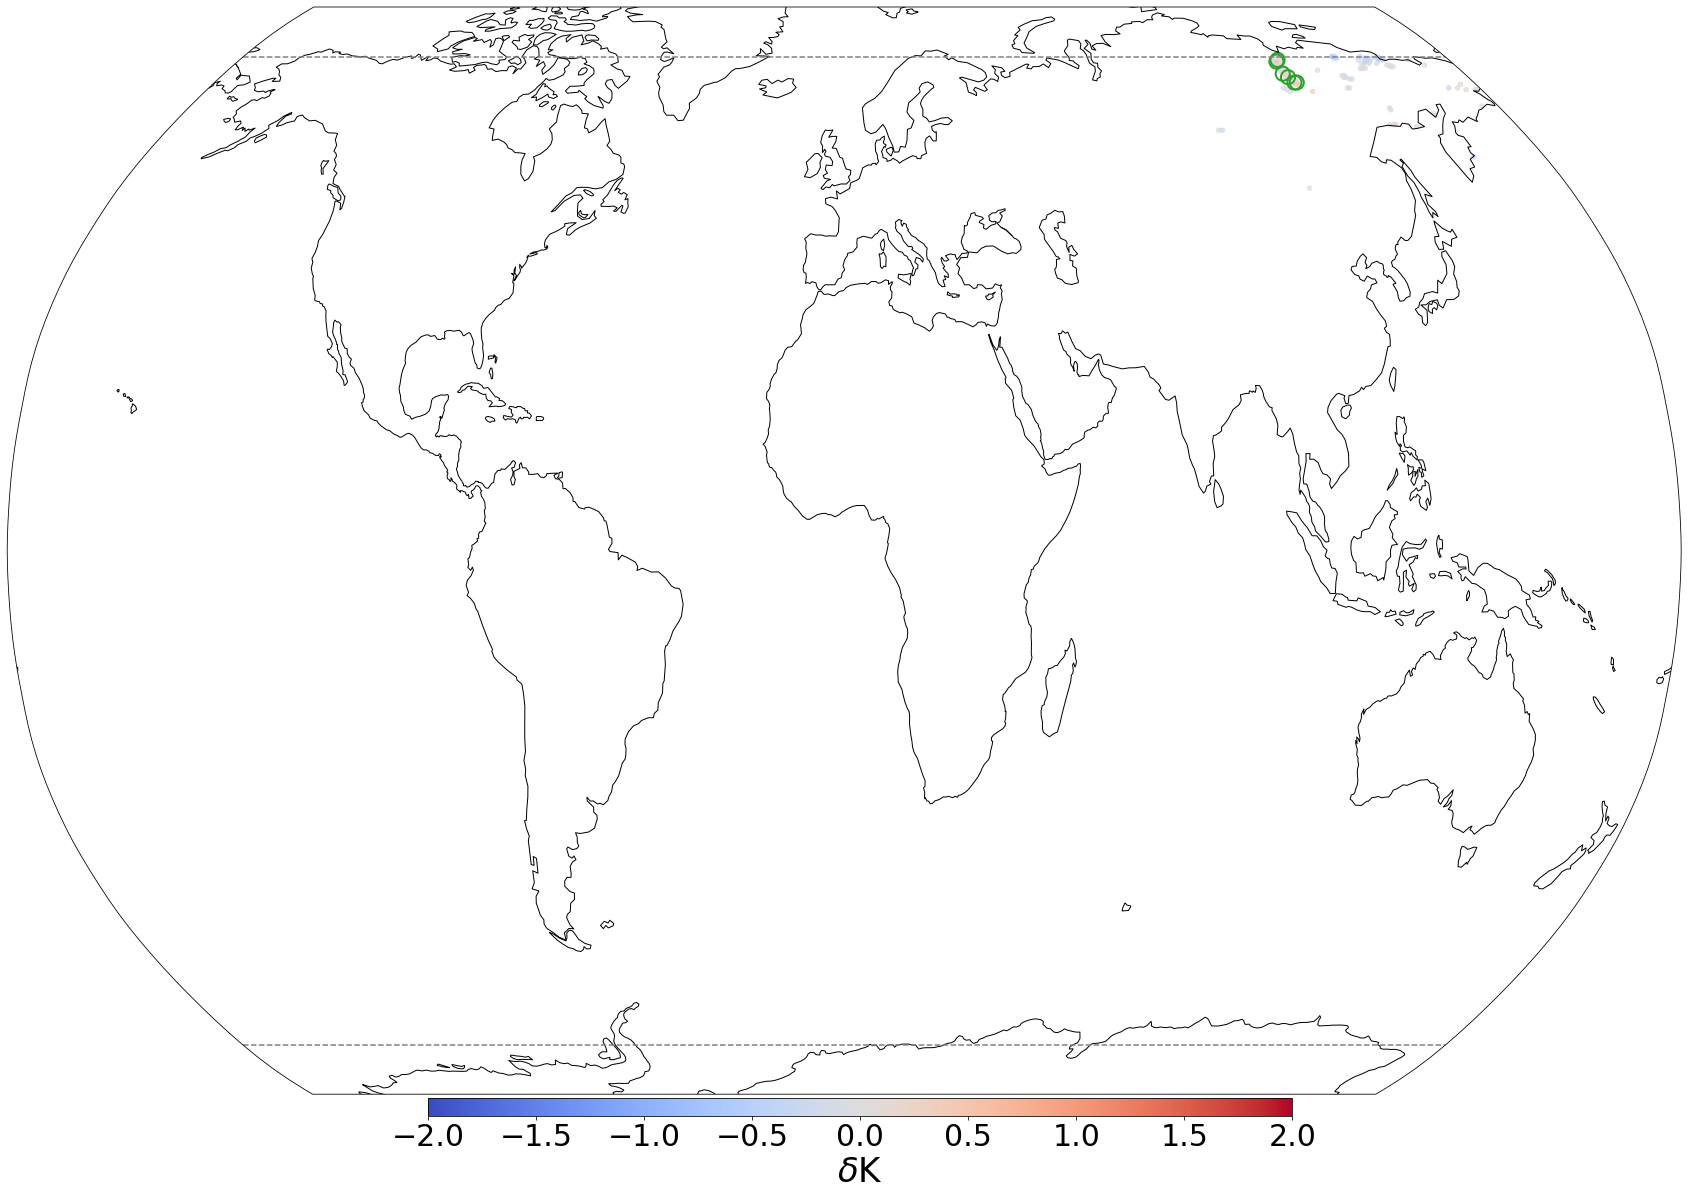

In [221]:
RobinsonPlot(df_north_lake,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_north_lake.sort_values(by=['delta'],ascending=False).iloc[3]) #[['latitude_ERA','longitude_ERA','delta']])
